
#  Inferential Statistics

## PETE 2061 Lab 8 Workbook 

## THIS IS DUE BY 11:59 PM TODAY (Oct 14, 2019)

1. **Using the example in "lab8_inferential_stats.ipynb", write a Python code to compute the confidence interval for the winning percentage of Ed Orgeron based on "poll-larger.csv", and show that he is the likely winner within a 95% confidence interval**
2. Type out:
    * (a) the 95% confidence interval
    * (b) the point estimate
    * (c) the margin of error.

In [1]:
import numpy as np
import scipy.stats as ss
import pandas as pd
import matplotlib.pyplot as plt

(0.4903, 0.5101025)

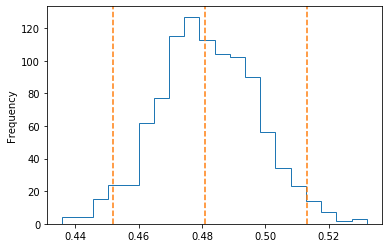

In [10]:
poll = pd.read_csv('poll-larger.csv')
poll['vote'].value_counts(normalize=True)
def sample(orgeron,n=1000):
    return pd.DataFrame({'vote':np.where(np.random.rand(n)<orgeron,"Saban","Orgeron")})

votes = pd.DataFrame([sample(0.5181)['vote'].value_counts(normalize=True) for i in range(1000)])
votes['Orgeron'].plot(kind='hist',histtype='step',bins = 20)

plt.axvline(votes['Orgeron'].quantile(0.025), c="C1",linestyle='--')
plt.axvline(votes['Orgeron'].quantile(0.5), c="C1",linestyle='--')
plt.axvline(votes['Orgeron'].quantile(0.975), c="C1",linestyle='--')

def samplingdist(orgeron,n=1000):
    return pd.DataFrame([sample(orgeron,n)['vote'].value_counts(normalize=True) for i in range (1000)])

def quantiles(orgeron,n=1000):
    votes = samplingdist(orgeron,n)
    return votes['Orgeron'].quantile(0.025), votes["Orgeron"].quantile(0.975)

quantiles(0.5,10000)

In [20]:
print(f"The confidence interval lies between 0.4903 - 0.5101025")
print(f"The point estimate is {votes['Orgeron'].quantile(0.5)}")
print(f"The margin of error is 0.03")

The confidence interval lies between 0.4903 - 0.5101025
The point estimate is 0.481
The margin of error is 0.03
